In [1]:
from becquerel import Spectrum
import numpy as np
import importlib
import sys
import matplotlib.pyplot as plt
sys.path.insert(0,r"C:\Users\benhu\Desktop\Research\radwatch-analysis")

import analysis_methods as am
import ROI
importlib.reload(am)
importlib.reload(ROI)

<module 'ROI' from 'C:\\Users\\benhu\\Desktop\\Research\\radwatch-analysis\\ROI.py'>

In [2]:
source_energies = np.array([605, 609, 662, 1460, 2614]);
spectrum = r'C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\UCB1903Tilapia.spe'
background = r'C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\background.spe'
livetime = 172800 #s
wetweight = 446.3 #g
spec = Spectrum.from_file(spectrum)
bgspec = Spectrum.from_file(background)
counts = spec.counts_vals
energies = spec.bin_centers_kev

roi = ROI.ROI(spec, bgspec, source_energies, 0)

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\UCB1903Tilapia.spe
SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\background.spe


c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a fu

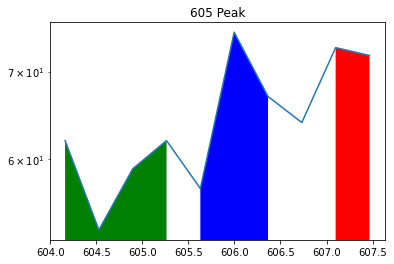

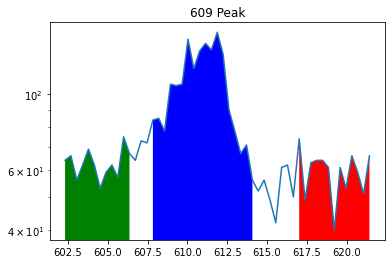

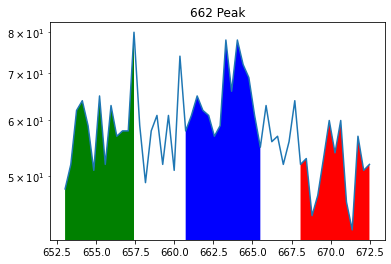

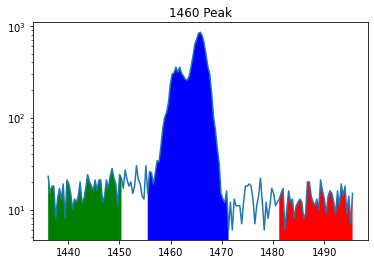

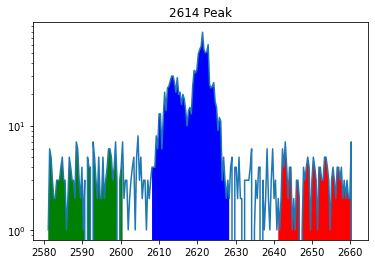

In [3]:
roi.set_sideband(605, 1, [[-2, -0.25], [-0.5, 1], [1, 2]])
roi.set_sideband(609, 5, [[-2, -1], [-0.85, 0.5], [1, 2]])
roi.set_sideband(662, 5, [[-2, -1], [-0.5, 0.6], [1, 2]])
roi.set_sideband(1460, 15, [[-2, -1], [-0.7, 0.4], [1, 2]])
roi.set_sideband(2614, 20, [[-2, -1], [-0.65, 0.4], [1, 2]])

roi.plot_peak_region(spec, source_energies, 605)
roi.plot_peak_region(spec, source_energies, 609)
roi.plot_peak_region(spec, source_energies, 662)
roi.plot_peak_region(spec, source_energies, 1460)
roi.plot_peak_region(spec, source_energies, 2614)

In [4]:
roi.find_peak_energies()
roi_counts, roi_unc = roi.get_counts()

eff_func = am.Efficiency()
eff_func.set_parameters()

efficiency = []
for i in source_energies:
    efficiency.append(eff_func.get_eff(i))

countrate = [i / livetime for i in roi_counts]
uncrate = [i / livetime for i in roi_unc]

print(efficiency)
print(countrate)
print(uncrate)

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)


background spec sidebands 186.3498728373669
bg peak counts 170.6818155505042
signal bg 190.5
signal peak 199.0
background spec sidebands 692.7281498319292
bg peak counts 1769.4903846524928
signal bg 761.5000000000002
signal peak 1885.9999999999995
background spec sidebands 630.3892836054756
bg peak counts 816.0724306008482
signal bg 720.0
signal peak 902.0000000000001
background spec sidebands 587.7188297178495
bg peak counts 2392.2123210750356
signal bg 605.5
signal peak 10817.0
background spec sidebands 174.68217060246917
bg peak counts 1216.1079357973426
signal bg 178.0
signal peak 1236.0000000000002
Loaded fit parameters 0-4: [-0.0530201  -0.23393142 -0.49270682 -1.0079565  -4.5553875 ]
Loaded input energies: []
Loaded energy uncertainties: [0.02016385 0.03079805 0.02757461 0.01707092 0.01090811 0.01032225]
[0.019812801529679906, 0.019742405309284897, 0.018854421202205197, 0.01051768041536737, 0.004697785950678424]
[0.00013986144263230716, 0.00027626021515877113, -2.131450807507207

In [6]:
sactivity, sactunc = [(i / j) / wetweight for i, j in zip(countrate, efficiency)], [(i / j) / wetweight for i, j in zip(uncrate, efficiency)]
for i, j, k in zip(source_energies, sactivity, sactunc):
    print("Specific activity at", i, "keV:", j, "±", k, "Bq/g (wet weight)")

Specific activity at 605 keV: 1.5817040534816434e-05 ± 1.546116177054839e-05 Bq/g (wet weight)
Specific activity at 609 keV: 3.135388746157312e-05 ± 4.348059210064858e-05 Bq/g (wet weight)
Specific activity at 662 keV: -2.5330001887984526e-06 ± 3.3644319842020516e-05 Bq/g (wet weight)
Specific activity at 1460 keV: 0.010364558048474175 ± 0.0001448573497503256 Bq/g (wet weight)
Specific activity at 2614 keV: 4.574773928477868e-05 ± 0.00014150960848361685 Bq/g (wet weight)
